**1.** Взять все признаки из датасета load_boston(). Применить модель Random Forest.

In [ ]:
# импортируем нужные библиотеки
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# загружаем данные
boston_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, shuffle = True, random_state = 42)

In [ ]:
# обучение модели
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**2.** Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.

In [ ]:
# предсказания зависимой переменной у на тестовом и обучающем наборе
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# метрики качества на тестовом и обучающем множестве
print('MAE train:', mae(y_train, y_train_pred))
print('MAE test:', mae(y_test, y_test_pred))

print('MSE train:', mse(y_train, y_train_pred))
print('MSE test:', mse(y_test, y_test_pred))

print('R2 train:', r2(y_train, y_train_pred))
print('R2 test:', r2(y_test, y_test_pred))

MAE train: 0.903477722772276
MAE test: 2.0395392156862746
MSE train: 1.9783925024752465
MSE test: 7.901513892156864
R2 train: 0.9772267182453291
R2 test: 0.8922527442109116


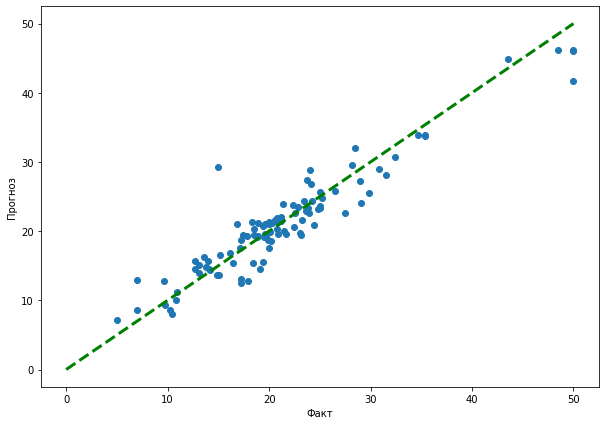

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_test_pred)
plt.plot([0,50], [0, 50], '--k', color='green', linewidth=3)
plt.xlabel('Факт')
plt.ylabel('Прогноз')
plt.show()

In [ ]:
# пробуем настроить гиперпараметры
def fit_predict(train, test, y_train, y_test, criterion = 'squared_error', n_estimators = 100, max_depth = None, min_sample_split = 2): 
  rf = RandomForestRegressor(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)
  rf.fit(train, y_train)
  y_pred_train = rf.predict(train)
  y_pred = rf.predict(test)
  print('train', r2(y_train, y_pred_train), 'test', r2(y_test, y_pred))

пайтон на criterion = 'mse' выдал ошибку что критерий mse устарел в версии 1.0 и будет удален в версии 1.2. Используйте 'criterion='squared_error', который эквивалентен.
Поэтому заменила на criterion = 'squared_error'


In [ ]:
# максимальная глубина деревьев
for max_depth in range(2,21):
  print('R^2 score using max_depth={0}:'.format(max_depth), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth = max_depth)

R^2 score using max_depth=2: train 0.7583365930248543 test 0.7051925579738612
R^2 score using max_depth=3: train 0.8701517598659052 test 0.8199021344140172
R^2 score using max_depth=4: train 0.9117658111791328 test 0.8619407460760009
R^2 score using max_depth=5: train 0.9343869296925865 test 0.87552136114995
R^2 score using max_depth=6: train 0.9513166678153011 test 0.870587430615823
R^2 score using max_depth=7: train 0.96013769431435 test 0.8727111096612162
R^2 score using max_depth=8: train 0.9682487562894482 test 0.8791581739081106
R^2 score using max_depth=9: train 0.9745799174910305 test 0.8783706567026036
R^2 score using max_depth=10: train 0.9735461647782909 test 0.8803644328477689
R^2 score using max_depth=11: train 0.9772040500379015 test 0.8896982587145897
R^2 score using max_depth=12: train 0.9782662640991903 test 0.882059192839183
R^2 score using max_depth=13: train 0.975144883507117 test 0.8879421702187642
R^2 score using max_depth=14: train 0.9797077756864901 test 0.87799

In [ ]:
# минимальное число объектов, чтобы узел дерева расщепился
for min_sample_split in range(5,51,5):
  print('R^2 score using min_sample_leaf = {0}:'.format(min_sample_split), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=min_sample_split)

R^2 score using min_sample_leaf = 5: train 0.8680041061131967 test 0.8249581279757483
R^2 score using min_sample_leaf = 10: train 0.871138911516526 test 0.8310981876148582
R^2 score using min_sample_leaf = 15: train 0.8699345195070314 test 0.818796887121573
R^2 score using min_sample_leaf = 20: train 0.8670627214899365 test 0.8173407891519633
R^2 score using min_sample_leaf = 25: train 0.8675455372447105 test 0.8213924924350583
R^2 score using min_sample_leaf = 30: train 0.8710404881447048 test 0.8237287115178974
R^2 score using min_sample_leaf = 35: train 0.8677408087434614 test 0.8266308859772449
R^2 score using min_sample_leaf = 40: train 0.8688055424277612 test 0.8303304040814823
R^2 score using min_sample_leaf = 45: train 0.8706002550200054 test 0.8207900473726306
R^2 score using min_sample_leaf = 50: train 0.8693309674926215 test 0.8325332203840649


In [ ]:
# критерий расщепления
for criterion in ['squared_error', 'absolute_error']:  # опять пришлось заменить так как Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  print('R^2 score using {0} criterion:'.format(criterion), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion=criterion)

R^2 score using squared_error criterion: train 0.8653255042024594 test 0.8202246568852396
R^2 score using absolute_error criterion: train 0.8445112170974405 test 0.808451979535278


In [ ]:
# число "деревьев" в "случайном лесу"
for n_estimators in range(100,1001,100):
  print('R^2 score using n_estimators = {0}:'.format(n_estimators), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion='squared_error', n_estimators=n_estimators)

R^2 score using n_estimators = 100: train 0.868670595949344 test 0.805963129259725
R^2 score using n_estimators = 200: train 0.871125508495563 test 0.826207539534323
R^2 score using n_estimators = 300: train 0.8691887877304287 test 0.8244084814698269
R^2 score using n_estimators = 400: train 0.8693791574563224 test 0.8273460328726295
R^2 score using n_estimators = 500: train 0.8678719543228358 test 0.8278686848054366
R^2 score using n_estimators = 600: train 0.870423430646478 test 0.828274003388735
R^2 score using n_estimators = 700: train 0.869639025181843 test 0.8229310385655472
R^2 score using n_estimators = 800: train 0.8701081489577429 test 0.8258928308913418
R^2 score using n_estimators = 900: train 0.8701290473186837 test 0.8262596896339294
R^2 score using n_estimators = 1000: train 0.8698412476228123 test 0.8237673493785913


In [ ]:
model2 = RandomForestRegressor(criterion='squared_error', n_estimators=300, max_depth=3, random_state=5, min_samples_split=15)

model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=300,
                      random_state=5)

In [ ]:
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)

print('R2 train:', r2(y_train, y_train_pred2))
print('R2 test:', r2(y_test, y_test_pred2))

R2 train: 0.8685861956584837
R2 test: 0.8248676153984816
